# Predicting House Prices with Linear Regression and DeepLearning


I have used deep neural networks, decision trees, and linear regression models to predict house prices.

In [1]:
#importing the Libraries
# Data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#Data Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression





### The Data
source: https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

In [2]:
#Download the Data
df = pd.read_csv('kc_house_data.csv', index_col=0)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

The dataset contains the following information for each entry:

**date**     : Date of sale    <n>       
**price**    : Price of the property      <n>      
**bedrooms** :Number of Bedrooms     <n>  
**bathrooms**:Number of Bathrooms     <n>        
**sqft_living** : living Squarefootage of property  <n>  
**sqft_lot**  :lot Squarefootage of property   <n>  
**floors**     :Number of floors<n>  
**waterfront**     : Has waterfront view = 1 <n>
                      No waterfront view = 0<n>
**view**           : Has  view = 1; <br>
                    No view = 0 <br>
**condition**      : Ranking property's condition on a scale of 5.0 being the worst and 5 being the best <br>
**grade**          : Grade  of property <br>
**sqft_above**   : Square footage above the ground<br>
**sqft_basement**  : Square footage of basement<br>
**yr_built**       : Year in which property was built <br>
**yr_renovated**   : Year in which property was renovated <br>
**zipcode**        : zipcode of property <br>
**lat**         : Latitude of property <br>
**long **       : Longitude of property <br>
**sqft_living15**  : Squqre footage of living space <br>
**sqft_lot15**    : Square footage of entire lot <br>

In [5]:
# Changing date to yyyymm format


In [6]:
# data overview of the df
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ',df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nMissing values percentage:  ',df.isnull().sum().values.sum()/df.shape[0])
print ('\nUnique values :  \n', df.nunique())
print ('\nThe number of duplicate rows is:', df.duplicated().value_counts())
#Check for duplicates
print ('The number of duplicated rows is:', df.duplicated().sum())


Rows     :  21613
Columns  :  20

Features :  ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Missing values :   0

Missing values percentage:   0.0

Unique values :  
 date              372
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

The number of duplicate rows is: False    21613
dtype: int64
The number of duplicated rows is: 0


* There are no details missing.
* There are no duplicated values.
* There are a total of 21,613 entries of properties sold and 20 features describing the properties
* So,our data has no missing values as number of values in each column are equal.



In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


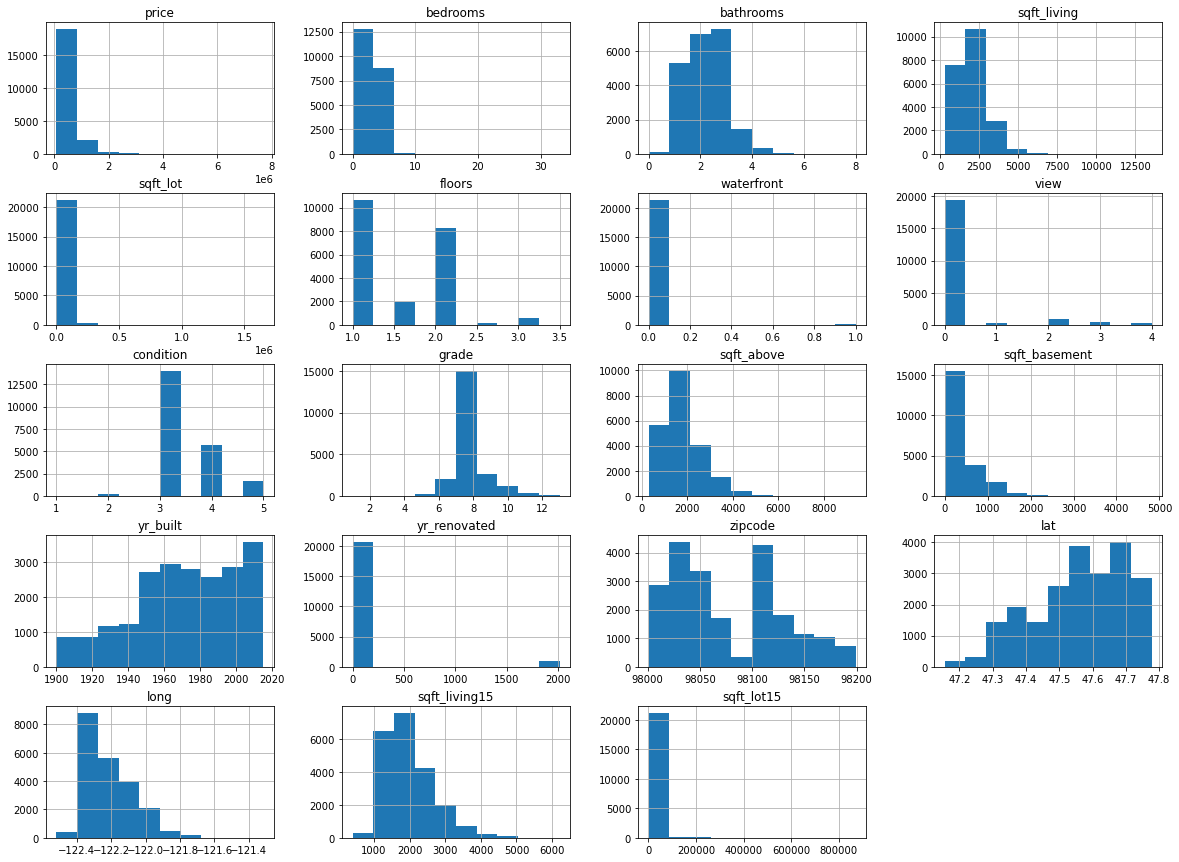

In [8]:
#Visualizing the distribution of the features
df.hist(bins=10, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

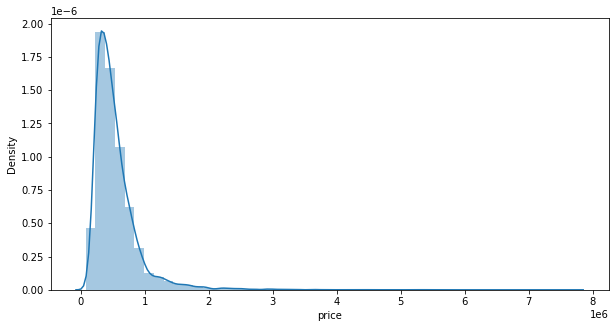

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'],bins=50)

There are some outliers.Let's remove them for better analysis.

In [10]:
copy_df = df[df['price']<2e6].copy()

<AxesSubplot:xlabel='price', ylabel='Density'>

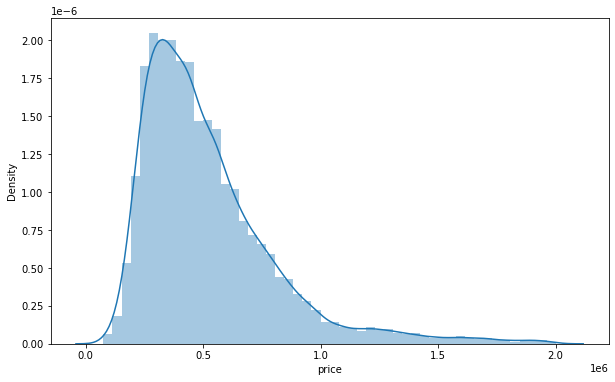

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(copy_df['price'],bins=50)

In [12]:
(len(df)-len(copy_df))*100/len(df)

0.9485032156572433

So,we removed less than 1% of our dataset.

<AxesSubplot:>

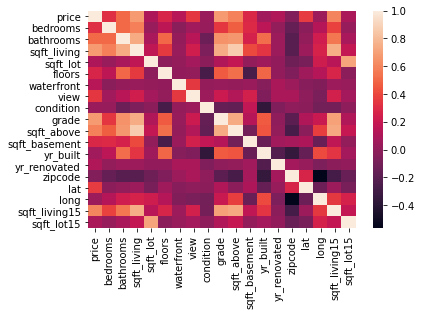

In [13]:
import seaborn as sns
corr = copy_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
copy_df.corr()['price'].sort_values()

zipcode         -0.046414
condition        0.037520
long             0.041282
yr_built         0.063701
sqft_lot15       0.090642
sqft_lot         0.101821
yr_renovated     0.118374
waterfront       0.142338
floors           0.278850
sqft_basement    0.285765
bedrooms         0.315724
view             0.344589
lat              0.363346
bathrooms        0.507522
sqft_above       0.585197
sqft_living15    0.602053
sqft_living      0.680123
grade            0.681087
price            1.000000
Name: price, dtype: float64

Let's visually explore highly correlated factors.

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

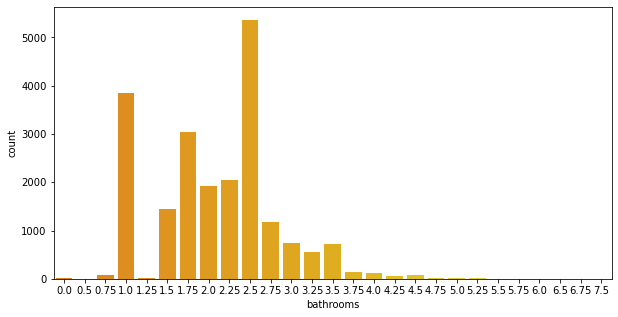

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='bathrooms',data=copy_df,palette='Wistia_r')

Text(0.5, 0, 'price')

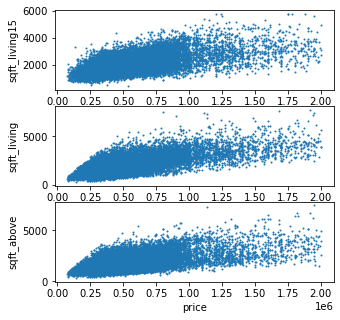

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(3,1,1)
plt.scatter(y='sqft_living15',x='price',data=copy_df,s=1)
plt.ylabel('sqft_living15')
plt.xlabel('price')
plt.subplot(3,1,2)
plt.scatter(y='sqft_living',x='price',data=copy_df,s=1)
plt.ylabel('sqft_living')
plt.xlabel('price')
plt.subplot(3,1,3)
plt.scatter(y='sqft_above',x='price',data=copy_df,s=1)
plt.ylabel('sqft_above')
plt.xlabel('price')

<AxesSubplot:xlabel='grade', ylabel='count'>

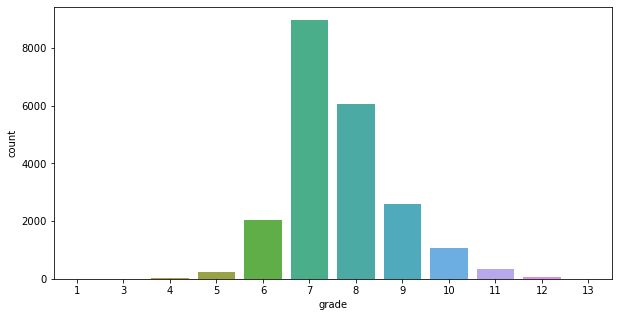

In [17]:
#Grade Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='grade',data=copy_df)

### Feature Engineering Section:

In [18]:
copy_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's explore date column

In [19]:
copy_df['date'].apply(lambda x:x[:-7])

id
7129300520    20141013
6414100192    20141209
5631500400    20150225
2487200875    20141209
1954400510    20150218
                ...   
263000018     20140521
6600060120    20150223
1523300141    20140623
291310100     20150116
1523300157    20141015
Name: date, Length: 21408, dtype: object

In [20]:
copy_df['date'] = pd.to_datetime(copy_df['date'])

In [21]:
copy_df['month'] = copy_df['date'].apply(lambda date:date.month)
copy_df['year'] = copy_df['date'].apply(lambda date:date.year)

In [22]:
copy_df.corr()['price'].sort_values()

zipcode         -0.046414
month           -0.015338
year             0.006029
condition        0.037520
long             0.041282
yr_built         0.063701
sqft_lot15       0.090642
sqft_lot         0.101821
yr_renovated     0.118374
waterfront       0.142338
floors           0.278850
sqft_basement    0.285765
bedrooms         0.315724
view             0.344589
lat              0.363346
bathrooms        0.507522
sqft_above       0.585197
sqft_living15    0.602053
sqft_living      0.680123
grade            0.681087
price            1.000000
Name: price, dtype: float64

The month and year doesnt seem to impact the price.But I will retain them to analyse their effect on my model.
I will drop the feature zipcode.

In [23]:
copy_df.drop('zipcode',axis=1,inplace=True)

<AxesSubplot:xlabel='month'>

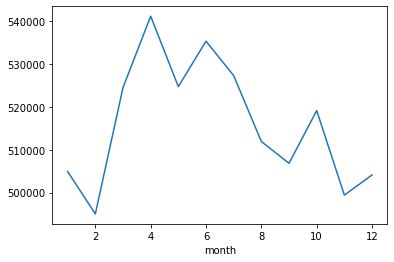

In [24]:
copy_df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

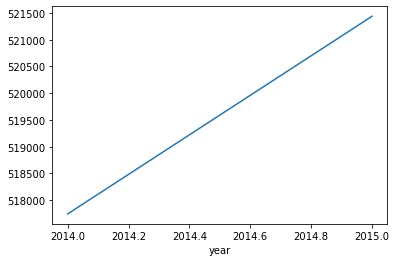

In [25]:
copy_df.groupby('year').mean()['price'].plot()

In [26]:
copy_df.drop('date',axis=1,inplace=True)

In [27]:
copy_df['sqft_basement'].value_counts()

0       13071
600       219
700       214
500       214
800       205
        ...  
2610        1
2850        1
915         1
20          1
1135        1
Name: sqft_basement, Length: 292, dtype: int64

I will categorize this column as having a basement(0) or not(1).

In [28]:
def convert_to_dummy(value):
    if value == 0:
        return 0
    else:
        return 1
copy_df['basement']=copy_df['sqft_basement'].apply(convert_to_dummy)
copy_df['basement'].value_counts()

0    13071
1     8337
Name: basement, dtype: int64

In [29]:
copy_df.drop('sqft_basement',axis=1,inplace=True)

In [30]:
copy_df['yr_renovated'].value_counts()

0       20526
2014       91
2013       36
2007       34
2000       34
        ...  
1959        1
1954        1
1948        1
1944        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
def convert_to_dummy(value):
    if value == 0:
        return 0
    else:
        return 1
copy_df['renovated']=copy_df['yr_renovated'].apply(convert_to_dummy)
copy_df['renovated'].value_counts()

0    20526
1      882
Name: renovated, dtype: int64

In [32]:
copy_df.drop('yr_renovated',axis=1,inplace=True)

In [33]:
copy_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year',
       'basement', 'renovated'],
      dtype='object')

# Using Deep Neural Network

In [34]:
X = copy_df.drop('price',axis=1)
y = copy_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
scaler=MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(19,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [38]:
model.compile(optimizer='adam',loss='mse')

In [39]:
num_epochs=100
model.fit(X_train,y_train.values,epochs=num_epochs,batch_size=128,verbose=2)

Epoch 1/100
118/118 - 0s - loss: 344104534016.0000
Epoch 2/100
118/118 - 0s - loss: 83913957376.0000
Epoch 3/100
118/118 - 0s - loss: 50942218240.0000
Epoch 4/100
118/118 - 0s - loss: 46029815808.0000
Epoch 5/100
118/118 - 0s - loss: 40930885632.0000
Epoch 6/100
118/118 - 0s - loss: 35815133184.0000
Epoch 7/100
118/118 - 0s - loss: 31785455616.0000
Epoch 8/100
118/118 - 0s - loss: 28936712192.0000
Epoch 9/100
118/118 - 0s - loss: 27017857024.0000
Epoch 10/100
118/118 - 0s - loss: 25937321984.0000
Epoch 11/100
118/118 - 0s - loss: 25094469632.0000
Epoch 12/100
118/118 - 0s - loss: 24538130432.0000
Epoch 13/100
118/118 - 0s - loss: 24127963136.0000
Epoch 14/100
118/118 - 0s - loss: 23648790528.0000
Epoch 15/100
118/118 - 0s - loss: 23196313600.0000
Epoch 16/100
118/118 - 0s - loss: 22877863936.0000
Epoch 17/100
118/118 - 0s - loss: 22552123392.0000
Epoch 18/100
118/118 - 0s - loss: 22409050112.0000
Epoch 19/100
118/118 - 0s - loss: 22145320960.0000
Epoch 20/100
118/118 - 0s - loss: 21840

In [40]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

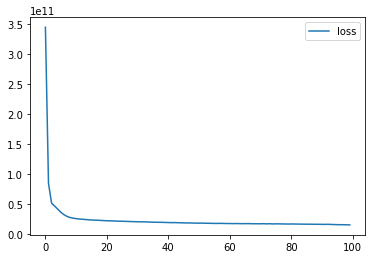

In [41]:
loss_df.plot()

In [42]:
predictions = model.predict(X_test)

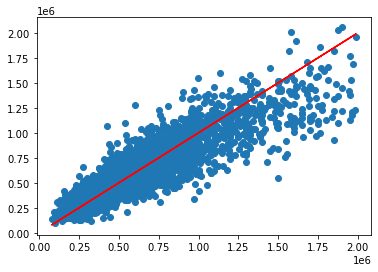

In [43]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [44]:
Deep_Net =['Deep Net',mean_absolute_error(y_test,predictions),np.sqrt(mean_squared_error(y_test,predictions)),explained_variance_score(y_test,predictions)]

In [45]:
error_metrics=pd.DataFrame({'model':[],'mean absolute error':[],'root mean squared error':[],'Explained variance score':[]})

In [46]:
error_metrics.loc[0]= Deep_Net

In [47]:
error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Deep Net,80006.942449,122834.473746,0.817562


# Decision Trees

In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
pred = dtree.predict(X_test)

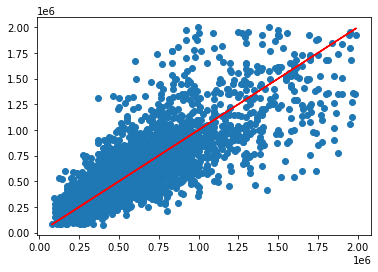

In [50]:
# Our predictions
plt.scatter(y_test,pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [51]:
Decision_Tree =['Decision Tree',mean_absolute_error(y_test,pred),np.sqrt(mean_squared_error(y_test,pred)),explained_variance_score(y_test,pred)]

In [52]:
error_metrics.loc[1] = Decision_Tree

In [53]:
error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Deep Net,80006.942449,122834.473746,0.817562
1,Decision Tree,105000.338160,166201.085822,0.664628


# Linear Regression Model

In [54]:
lm=LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
pred_lm = lm.predict(X_test)

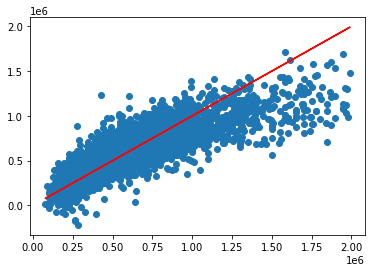

In [57]:
# Our predictions
plt.scatter(y_test,pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
Linear_model =['Linear Regression',mean_absolute_error(y_test,pred_lm),np.sqrt(mean_squared_error(y_test,pred_lm)),explained_variance_score(y_test,pred_lm)]

error_metrics.loc[2]= Linear_model

error_metrics

,model,mean absolute error,root mean squared error,Explained variance score
0,Deep Net,80006.942449,122834.473746,0.817562
1,Decision Tree,105000.338160,166201.085822,0.664628
2,Linear Regression,107745.899359,155071.383087,0.708040


 Mean Absolute Error, Root Mean Squared Error (RMSE), and explained variance scores obtained by the Deep Net,Decision Tree and Linear Regression which are the important metrics to compare different models. Having a R-squared value closer to one and smaller RMSE means a better fit.
 
 
 **Mean Absolute Error**, also known as MAE, is the average sum of all absolute errors.MAE does'nt consider the direction of the error. In other words, it measures the  average bias of the model
MAE = Average of All absolute errors.
According to my model, the predicted house price can be + or - 80,006.94 with the Deep Neural Network, while the Decision tree and Linear Regression predictions may be off by ~105,000 and 107,000.

**The Root Mean Squared Error** (RMSE) is a quadratic scoring rule that also measures the average magnitude of the error. This means the RMSE has the benefit of penalizing large errors more so and can be more appropriate in this situation. A smaller RMSE means a better model fit.Once again the deep neural network has the best RMSE score.

**The Explained Variance**
Variance is the amount that the estimate of the target function will change if different training data was used. 
Explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data.Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions (Rosenthal & Rosenthal, 2011).
In this case, the deep learning model can explain ~82% of the variance.
Thus the Deep Learning Neural Network Model performed the best. 
